# Variables

In [47]:
import matplotlib.pyplot as plt
import math

EnergyTxRxCircuitry = 50    #nJ/bit
packet = 2000               #bit
k = 1                       #nJ/bit/m²

battery = 5*10e5            #nJ


# Finding system's lifetime

Sensors positioning

In [48]:
sensors = [(1,2), (10,3), (4,8), (15,7), (6,1), (9,12), (14,4), (3, 10), (7,7), (12, 14)]
sink = (20,20)
x_coords = [sensor[0] for sensor in sensors]
y_coords = [sensor[1] for sensor in sensors]

Plot nodes' position

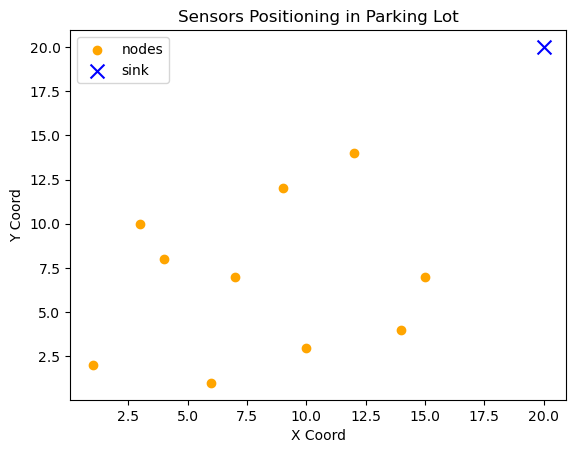

In [49]:
plt.scatter(x_coords, y_coords, color='orange', label='nodes')

plt.scatter(20, 20, color='blue', marker='x', s=100, label='sink')

plt.xlabel('X Coord')
plt.ylabel('Y Coord')
plt.title('Sensors Positioning in Parking Lot')

plt.legend()

plt.show()

Computing the distances from each node to the sink

In [50]:
distances = [math.sqrt((x - sink[0])**2 + (y - sink[1])**2) for x, y in sensors]
max = -1
for i, dist in enumerate(distances):
    print(f"Distance from the the node {sensors[i]} to the sink is: {dist:.2f} meters")
    if(dist > max):
        max = dist

Distance from the the node (1, 2) to the sink is: 26.17 meters
Distance from the the node (10, 3) to the sink is: 19.72 meters
Distance from the the node (4, 8) to the sink is: 20.00 meters
Distance from the the node (15, 7) to the sink is: 13.93 meters
Distance from the the node (6, 1) to the sink is: 23.60 meters
Distance from the the node (9, 12) to the sink is: 13.60 meters
Distance from the the node (14, 4) to the sink is: 17.09 meters
Distance from the the node (3, 10) to the sink is: 19.72 meters
Distance from the the node (7, 7) to the sink is: 18.38 meters
Distance from the the node (12, 14) to the sink is: 10.00 meters


All the nodes will consume the same amount of energy to power the transmission circuitry, so the node which is furthest from the sink will consume more energy to transmit the payload, so it will finish the battery earlier

In [51]:
MaxTransmissionEnergy = k*(max**2) #nJ/bit
print("Max transmission energy: ", MaxTransmissionEnergy," nJ/bit")

Max transmission energy:  685.0  nJ/bit


Total energy consumption of the furthest node

In [52]:
TotEnergy= (EnergyTxRxCircuitry + MaxTransmissionEnergy) * packet
print("Total consumed energy:", TotEnergy," nJ")

Total consumed energy: 1470000.0  nJ


Number of **cycles** needed to consume the battery:  

In [53]:
cycles = battery / TotEnergy
print(f"Power cycles: {cycles:.2f}")
print(f"Lifetime: {cycles * 10:.2f} minutes")

Power cycles: 3.40
Lifetime: 34.01 minutes


# Optimal sink position

To find the optimal position of the sink it's necessary to determine the point which minimizes the energy consumption of the most distant sensor. 

Computing such point is possible by solving an optimization problem, which is by the way non-linear due to the distance of a node from a sink being proportional to the squared difference between the coordinate of the sink and the ones of the point at maximum distance from it. 

Solving this kind of problem could be done using specific tools, but an easier way is to calculate the minimum of the maximum distances for a set of discretized point of the plane covering all the area occupied by the sensors and update the result as long as points with a lower value are found.


Optimal sink position: (6.87, 7.66), minimum max distance: 8.16


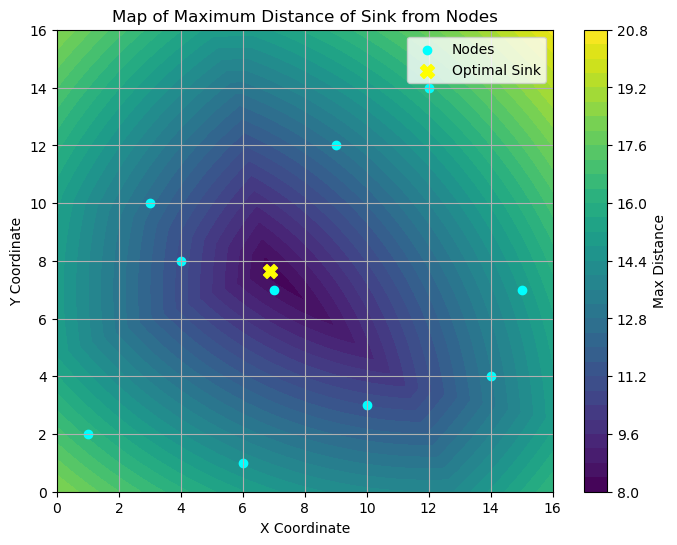

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Define sensor positions
nodes = np.array([
    [1, 2], [10, 3], [4, 8], [15, 7], [6, 1],
    [9, 12], [14, 4], [3, 10], [7, 7], [12, 14]
])

# Define grid resolution
resolution = 0.01

x_vals = np.arange(0, 16 + resolution, resolution)
y_vals = np.arange(0, 16 + resolution, resolution)
x, y = np.meshgrid(x_vals, y_vals)

# Initialize distances matrix
z = np.zeros_like(x)

# Initialize optimal point
sink_p = [0, 0]
z_min = float('inf')

# Compute max distance for each grid point
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        distances = np.sqrt((nodes[:, 0] - x[i, j])**2 + (nodes[:, 1] - y[i, j])**2)
        z[i, j] = np.max(distances)  # Store the max distance
        
        # Update optimal position if a lower max distance is found
        if z[i, j] < z_min:
            z_min = z[i, j]
            sink_p = [x[i, j], y[i, j]]

# Plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(x, y, z, levels=30, cmap='viridis')
plt.colorbar(label="Max Distance")
plt.scatter(nodes[:, 0], nodes[:, 1], color='cyan', marker='o', label="Nodes")
plt.scatter(sink_p[0], sink_p[1], color='yellow', marker='X', s=100, label="Optimal Sink")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Map of Maximum Distance of Sink from Nodes")
plt.legend()
plt.grid(True)

print(f"Optimal sink position: ({sink_p[0]:.2f}, {sink_p[1]:.2f}), minimum max distance: {z_min:.2f}")

plt.show()


# Trade offs of a mobile sink
A mobile sink forces sensors to adjust their transmission power dynamically, which can increase
the energy consumption. If the sink moves too far, some nodes may not reach the sink and will
be forced to retransmit data, if reliabile communication protocols are used, otherwise the data
will be lost.
The position granting the lowest energy consumption is one and so it would not be useful in
terms of energy consumes to implement a dynamical sink.